In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from io import StringIO
import os
working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "2_data/ppd.csv"
filePath = os.path.join(working_dir, data_path)

shot_data = pd.read_csv(filePath)
shot_data.head()

,scaled_dist,scaled_ppd,detonation
0,1.49,0.34,5-Ton TNT
1,1.72,0.44,5-Ton TNT
2,2.26,1.24,5-Ton TNT
3,2.26,1.24,5-Ton TNT
4,3.16,1.81,5-Ton TNT


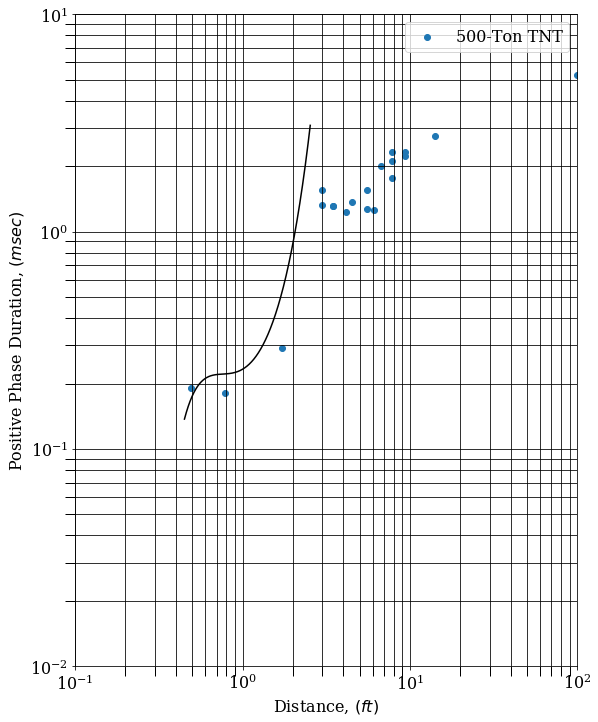

In [10]:
import matplotlib.pyplot as plt

import numpy as np
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

Blast = 'surface'

if Blast == 'freeair':
    T = np.arange(0.134,100.0,0.001)
    TL = np.log10(T)
    U = (-0.80501734056 + 1.37407043777*TL)   
    Y = 10**(- 0.0423733936826 + 1.36456871214000*U
        - 0.0570035692784*U**2 - 0.18283222479600*U**3
        + 0.0118851436014*U**4 + 0.04326486876270*U**5  
        - 0.0007997367834*U**6 - 0.00436073555033*U**7)

else: #surface
    T1 = np.arange(0.450,2.54,0.001)
    TL1 = np.log10(T1)
    U1 = (-0.1790217052 + 9.2996288611*TL1)   
    Y = 10**(0.20096507334        - 0.0297944268976*U1
         + 0.03063295428800*U1**2 + 0.0183405574086*U1**3
         - 0.01739646662110*U1**4 - 0.00106321963633*U1**5
         + 0.00562060030977*U1**6 + 0.00016182174990*U1**7
         - 0.00068601889440*U1**8)
    
    T2 = np.arange(2.54,7.00,0.001)
    TL2 = np.log10(T2)
    U2 = (-5.85909812338 + 5.25099193925*TL2)   
    Y = 10**(- 0.614227603559    + 0.130143717675*U2
         + 0.13457251195400*U2**2 + 0.03915742769060*U2**3
         - 0.00475933664702*U2**4 + 0.00428144598008*U2**5)

    T3 = np.arange(7.00,100.00,0.001)
    TL3 = np.log10(T3)
    U3 = (-0.1790217052 + 5.25099193925*TL3)   
    Y = 10**(- 0.614227603559    + 0.130143717675*U3
         + 0.13457251195400*U3**2 + 0.03915742769060*U3**3
         - 0.00475933664702*U3**4 + 0.00428144598008*U3**5)

pltfont = {'fontname':'serif', 'fontsize':'16'}
fig, ax = plt.subplots(figsize=(9, 12))

for c, shot_data in shot_data.groupby('detonation'):
    ax.scatter(shot_data.scaled_dist, shot_data.scaled_ppd, label=c)

ax.legend()
ax.tick_params('both', length=10, width=1, which='minor')
plt.grid(b=True, which='both', color='black', linestyle='-')
plt.ylim(0.01,10)
plt.xlim(0.1,100)
plt.loglog(T,Y,color='black');
plt.ylabel(r'Positive Phase Duration, $\left(msec\right)$')
plt.xlabel(r'Distance, $\left(ft\right)$')
plt.show()

'500-Ton TNT'